In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# OpenCV and Numpy

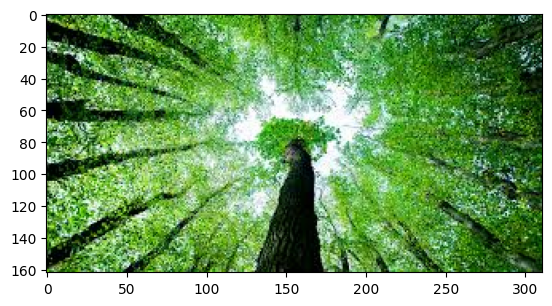

In [5]:
image_color = cv2.imread('./images/image1.png', 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)) # using bgr for developer purpose

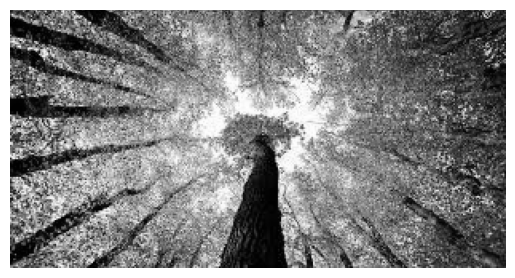

In [9]:
image_grey = cv2.imread('./images/image1.png', 0)
plt.imshow(cv2.cvtColor(image_grey, cv2.COLOR_BGR2RGB))
# or using image[:, :, [2, 1, 0]]
# or using imag [:, :, ::-1]
plt.axis('off');

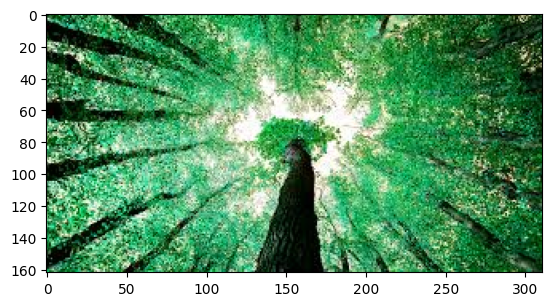

In [10]:
plt.imshow(image_color)

# Image Loading

In [11]:
import glob
import cv2
import numpy as np
from tqdm import tqdm

In [13]:
file_paths = glob.glob("./images/samples/*jpg")
images = []

for path in tqdm(file_paths):
    img = cv2.imread(path, 1)
    img = cv2.resize(img, (50, 50))

    images.append(img)

images = np.array(images)
print(images.shape)

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 256.96it/s]

(9, 50, 50, 3)


# Brightness and changes

In [15]:
image = cv2.imread('./images/image1.png', 1)
print(image.shape)
print(image.dtype)

(162, 311, 3)
uint8


In [17]:
data = np.array([1, 2.5])
print(data.dtype)

data = data.astype(np.uint8)
print(data.dtype)

float64
uint8


In [18]:
# out of range problems
data = np.array([0, 255])
data = data.astype(np.uint8)
print(data)
data += 10
print(data)

[  0 255]
[10  9]


In [20]:
# clip and where functions
data = np.array([1,2,3,4,5,6,7,8])
print("Data: ", data)

result = np.clip(data, a_min= 3, a_max= 6)
print("Result: ", result)

arr = np.arange(5)
print("Arr: ", arr)

condition = arr < 3
out = np.where(condition, arr, arr*2)
print(condition)
print("Out_arr: ", out)

Data:  [1 2 3 4 5 6 7 8]
Result:  [3 3 3 4 5 6 6 6]
Arr:  [0 1 2 3 4]
[ True  True  True False False]
Out_arr:  [0 1 2 6 8]


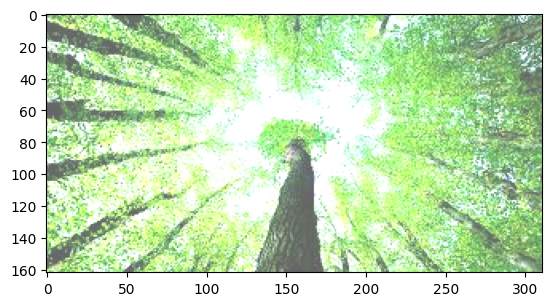

In [25]:
# increase birghtness
image = cv2.imread('./images/image1.png', 1)
image = np.where(image.astype(float) + 100 > 255, 255, image + 100)
#! Must convert to float since if the color value of a pixel is 200, if + 100 then it will be 300-256 = 44 -> not correct
plt.imshow(image[:, :, ::-1])

In [30]:
def increase_brightness(image, value):
    image = image.astype(float)

    image += value
    image = np.clip(image, a_min=0, a_max=255)
    return image.astype(np.uint8)
def decrease_brightness(image, value):
    image = image.astype(float)

    image -= value
    image = np.clip(image, a_min=0, a_max=255)
    return image.astype(np.uint8)

(np.float64(-0.5), np.float64(310.5), np.float64(161.5), np.float64(-0.5))

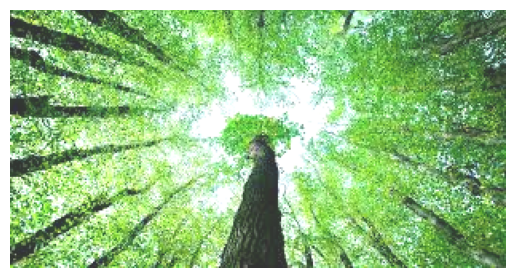

In [29]:
image = cv2.imread('./images/image1.png', 1)
plt.imshow(
    increase_brightness(image, 50)[:, :, ::-1]
)
plt.axis('off')

(np.float64(-0.5), np.float64(310.5), np.float64(161.5), np.float64(-0.5))

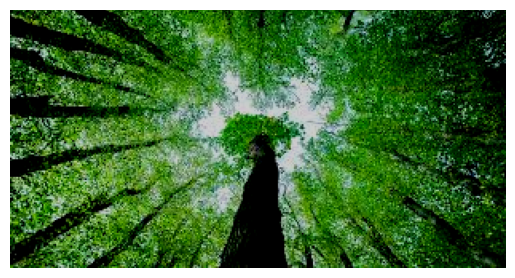

In [31]:
image = cv2.imread('./images/image1.png', 1)
plt.imshow(
    decrease_brightness(image, 50)[:, :, ::-1]
)
plt.axis('off')

# Color Conversion

In [5]:
data = np.array([
    [2, 6, 0, 1, 9],
    [3, 0, 8, 3, 4],
    [4, 4, 5, 0, 7],
    [2, 0, 4, 6, 2]
])
result = np.apply_along_axis(
    np.max,
    axis = 1,
    arr=data
)
print(data.shape)
print(result)

(4, 5)
[9 8 7 6]


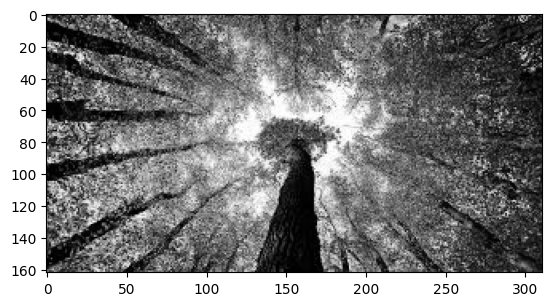

In [42]:
def color2grayscale(vector):
    result = vector.mean()
    result = result.astype(np.uint8)
    return result
image = cv2.imread('./images/image1.png', 1)

grayscale_img = np.apply_along_axis(
    color2grayscale,
    axis= 2,
    arr=image[:, :, ::-1]     
)
plt.imshow(grayscale_img, cmap='grey')

# Extra: Cropping a Region

```python
import cv2
import numpy as np

# Read the image
img = cv2.imread('image.jpg', 1)

# Get the dimensions of the image
height, width, channel = img.shape

# Define the coordinates of the bounding box
x_0, y_0 = 470, 120
x_1, y_1 = 800, 850

# Define the color for the bounding box (red in this case)
color = np.array([0, 0, 255])  # BGR format

# Draw the bounding box by setting the pixel values along the edges
img[y_0:y_1, x_0:x_0+1, :] = color  # Left edge
img[y_0:y_1, x_1:x_1+1, :] = color  # Right edge
img[y_0:y_0+1, x_0:x_1, :] = color  # Top edge
img[y_1:y_1+1, x_0:x_1, :] = color  # Bottom edge

# Save the image with the bounding box
cv2.imwrite('output_bb.jpg', img)
```